
# <center>KodeCamp - Data Science</center>

Author: DSC UG - Machine Learning & Artificial Intelligence Division
- INSTAGRAM : [dsc.ug](https://www.instagram.com/dsc.ug/)
- WEBSITE : [bit.ly/DSCUG-WEB](http://bit.ly/DSCUG-WEB)
- EVENT REGISTRATION : [bit.ly/DSCGUNADARMA](http://bit.ly/DSCGUNADARMA)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manfredmichael/Learning-Notebooks/blob/master/Random%20/KodeKamp%20x%20DSC%20UG%20-%20March.ipynb)



<font></font>

<font></font>

# Supervised Learning

Kita akan melakukan klasifikasi jenis bunga iris melalui supervised learning. Pertama, kita akan mengupload file dataset ke google colab.

## Get the Data

Download file **dataset.zip** [disini](https://drive.google.com/file/d/1_9jh9VNVUm8EEiPDDqbIqVlKFZ4uZY6C/view?usp=sharing). Lalu upload ke notebook ini.

Untuk meng-ekstrak file zip, kita akan menggunakan fungsi `ZipFile()` dari library zipfile. Kita akan menyerahkan nama file, dan mode sebagai argumen.

<font size=5><center>ZipFile(<font color=darkgrey>nama file</font>, <font color=darkgrey>mode</font>)</center></font>

mode untuk membuka file adalah: 
- 'r' = read
- 'w' = write
- 'x' = execute


In [ ]:
from zipfile import ZipFile

zip = ZipFile('dataset.zip','r')
zip.extractall()
zip.close()

Isi dari file week2.zip adalah:
- Iris.csv
- Mall_Customers.csv
- image1.jpeg

Kita akan melakukan klasifikasi dataset bunga iris yang disimpan dalam file **Iris.csv**.


## Load Data


Untuk menangani data tabel, kita akan menggunakan library Pandas. Pandas mempunyai fungsi `read_csv()` untuk men-load file dengan tipe *csv*.


<font size=5><center>read_csv(<font color=darkgrey>nama file</font>)</center></font>

In [ ]:
import pandas as pd

credit = pd.read_csv('credit_approval.csv')

In [ ]:
credit.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [ ]:
len(credit)

690

## Data Preparation

Ketika file *csv* di-load dengan Pandas, file tersebut ditangani sebagai <u>DataFrame</u>. Kolom dalam DataFrame disebut Series. Dengan memanggil atribut `columns`, kita bisa melihat daftar nama Series dari DataFrame itu.

In [ ]:
credit.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus'],
      dtype='object')

Untuk mendapatkan salah satu Series, kita bisa memanggil nama DataFrame dan menyerahkan nama Series yang diinginkan ke dalam kurung besar.

<font size=5><center>nama_DataFrame[<font color=darkgrey>nama series</font>]</center></font>

In [ ]:
credit['Age']

0      30.83
1      58.67
2      24.50
3      27.83
4      20.17
       ...  
685    21.08
686    22.67
687    25.25
688    17.92
689    35.00
Name: Age, Length: 690, dtype: float64

Bila ingin mendapat lebih dari 1 Series, kita bisa panggil DataFrame seperti berikut.


<font size=5><center>nama_DataFrame[[<font color=darkgrey>daftar nama series</font>]]</center></font>

In [ ]:
credit[['Debt', 'ApprovalStatus']]

,Debt,ApprovalStatus
0,0.000,+
1,4.460,+
2,0.500,+
3,1.540,+
4,5.625,+
...,...,...
685,10.085,-
686,0.750,-
687,13.500,-
688,0.205,-


In [ ]:
credit.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


Untuk mendapatkan fitur datanya, Series yang bukan termasuk fitur akan di-drop. kita akan memanggil fungsi `drop()` dan menyerahkan nama-nama Series non-fitur & aksis sebagai argumen.

<font size=5><center>drop([<font color=darkgrey>daftar nama series</font>], axis=<font color=darkgrey>aksis</font>)</center></font>

Untuk aksis, terdapat 2 pilihan (0 dan 1). Berikut adalah pilihan aksis:
- 0 : Baris (Horizontal)
- 1 : Kolom (Vertikal)

Karena kita akan men-drop kolom, kita akan gunakan aksis 1.

In [ ]:
x = credit.drop('ApprovalStatus', axis=1)

In [ ]:
y = credit['ApprovalStatus']

In [ ]:
x.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [ ]:
y.head()

0    +
1    +
2    +
3    +
4    +
Name: ApprovalStatus, dtype: object

In [ ]:
y.unique()

array(['+', '-'], dtype=object)

## Data Splitting

Performa sebuah model hanya bisa diuji terhadap data yang belum pernah dilihat sebelumnya (yang tidak dipakai untuk training). Maka, sebagian dataset harus dipisah sebagai test data. 

Kita memanggil fungsi `train_test_split()` dan menyerahkan dataset dan rasio test data sebagai argumen. Kita akan mengalokasikan 30% dari dataset sebagai test data. 

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
x_train.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
279,b,16.25,0.835,u,g,m,v,0.085,t,f,0,f,s,200.0,0
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,400.0,0
413,b,40.58,1.500,u,g,i,bb,0.000,f,f,0,f,s,300.0,0
493,a,20.50,11.835,u,g,c,h,6.000,t,f,0,f,g,340.0,0
409,b,17.08,0.250,u,g,q,v,0.335,f,t,4,f,g,160.0,8


## Handling Missing Data

### Numeric Data

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)

num = x_train.select_dtypes(include=np.number)
num.head()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income
279,16.25,0.835,0.085,0,200.0,0
684,40.58,3.290,3.500,0,400.0,0
413,40.58,1.500,0.000,0,300.0,0
493,20.50,11.835,6.000,0,340.0,0
409,17.08,0.250,0.335,4,160.0,8


In [ ]:
num.isna().sum()

Age              11
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode           6
Income            0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='mean')
num = num_imputer.fit_transform(num)
num

array([[ 16.25 ,   0.835,   0.085,   0.   , 200.   ,   0.   ],
       [ 40.58 ,   3.29 ,   3.5  ,   0.   , 400.   ,   0.   ],
       [ 40.58 ,   1.5  ,   0.   ,   0.   , 300.   ,   0.   ],
       ...,
       [ 23.17 ,  11.125,   0.46 ,   1.   , 100.   ,   0.   ],
       [ 21.08 ,   4.125,   0.04 ,   0.   , 140.   , 100.   ],
       [ 20.   ,   0.   ,   0.5  ,   0.   , 144.   ,   0.   ]])

### Categorical Data

In [ ]:
cat = x_train.select_dtypes(exclude=np.number)
cat.head()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen
279,b,u,g,m,v,t,f,f,s
684,b,u,g,m,v,f,f,t,s
413,b,u,g,i,bb,f,f,f,s
493,a,u,g,c,h,t,f,f,g
409,b,u,g,q,v,f,t,f,g


In [ ]:
cat_imputer = SimpleImputer(strategy='most_frequent')
cat = cat_imputer.fit_transform(cat)

In [ ]:
cat

array([['b', 'u', 'g', ..., 'f', 'f', 's'],
       ['b', 'u', 'g', ..., 'f', 't', 's'],
       ['b', 'u', 'g', ..., 'f', 'f', 's'],
       ...,
       ['b', 'u', 'g', ..., 't', 'f', 'g'],
       ['b', 'y', 'p', ..., 'f', 'f', 'g'],
       ['b', 'u', 'g', ..., 'f', 'f', 'g']], dtype=object)

## Data Preprocessing

### Numeric Data

In [ ]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
scaler.fit(num)
num_scaled = scaler.transform(num)

In [ ]:
num_scaled

array([[0.08098242, 0.00416125, 0.0004236 , 0.        , 0.99670675,
        0.        ],
       [0.10092473, 0.00818241, 0.0087047 , 0.        , 0.99482233,
        0.        ],
       [0.13404426, 0.00495481, 0.        , 0.        , 0.99096296,
        0.        ],
       ...,
       [0.22439348, 0.1077418 , 0.00445494, 0.00968466, 0.96846561,
        0.        ],
       [0.12158112, 0.02379137, 0.0002307 , 0.        , 0.80746471,
        0.57676051],
       [0.13756756, 0.        , 0.00343919, 0.        , 0.99048642,
        0.        ]])

### Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_enc = encoder.fit_transform(cat)

In [ ]:
cat_enc

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

### Concatenate All Data

In [ ]:
x_train_prepared = np.concatenate([num_scaled, cat_enc], axis=1)
x_train_prepared

array([[0.08098242, 0.00416125, 0.0004236 , ..., 0.        , 0.        ,
        1.        ],
       [0.10092473, 0.00818241, 0.0087047 , ..., 0.        , 0.        ,
        1.        ],
       [0.13404426, 0.00495481, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.22439348, 0.1077418 , 0.00445494, ..., 1.        , 0.        ,
        0.        ],
       [0.12158112, 0.02379137, 0.0002307 , ..., 1.        , 0.        ,
        0.        ],
       [0.13756756, 0.        , 0.00343919, ..., 1.        , 0.        ,
        0.        ]])

## Build & Train Model

Data telah siap untuk training model, dan juga sudah di split menjadi train data & test data. Kini saatnya kita menyerahkan data training untuk dipelajari model. Model yang digunakan adalah Support Vector Machine. 

Setalah membuat model, kita memanggil fungsi `fit()` dan menyerahkan data serta label sebagai argumen.

<font size=5><center>fit(<font color=darkgrey>data</font>, <font color=darkgrey>label</font>)</center></font>

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_prepared, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Setelahnya, kita menguji akurasi model.

In [ ]:
model.score(x_train_prepared, y_train)

0.8902691511387164

# Pipeline

## Numerical Data Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", Normalizer()),
])

## Categorical Data Pipeline

In [ ]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder(sparse=False, handle_unknown='ignore')),
])

## Full Pipeline

In [ ]:
num_cols = x_train.select_dtypes(include=np.number).columns 
cat_cols = x_train.select_dtypes(exclude=np.number).columns

In [ ]:
num_cols, cat_cols

(Index(['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income'], dtype='object'),
 Index(['Gender', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity',
        'PriorDefault', 'Employed', 'DriversLicense', 'Citizen'],
       dtype='object'))

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_cols),
    ("cat_pipeline", cat_pipeline, cat_cols),
])

# Evaluate Model

In [ ]:
model = LogisticRegression()

In [ ]:
full_pipeline.fit(x_train)
x_train_prepared = full_pipeline.transform(x_train)
x_test_prepared = full_pipeline.transform(x_test)

In [ ]:
model.fit(x_train_prepared, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.score(x_test_prepared, y_test)

0.8454106280193237

# Unsupervised Learning

Kita telah mencoba melatih model machine learning untuk membedakan data yang punya label. Kini kita akan melatih model machine learning untuk mempelajari data yang tidak memiliki label. Misalnya, membagi pelanggan toko menjadi beberapa kelompok.


## Get the data


Kita akan menggunakan data tabel yang disimpan dalam file **Mall_Customers.csv**. Data tersebut berisi data pengunjung mall. Dengan model *K-means clustering*, data pengunjung mall akan dibagi menjadi beberapa kelompok.

In [ ]:
mall_data = pd.read_csv('Mall_Customers.csv') 

In [ ]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Cluster Customers

K-means clustering membagi data menjadi beberapa cluster sesuai dengan kemiripan fiturnya. 

Mari lihat bagaimana model K-means membuat kluster berdasarkan data yang kita inginkan.

In [ ]:
col1 = 'Spending Score (1-100)'
# col2 = 'Annual Income (k$)'
col2 = 'Age'

data = mall_data[[col1, col2]]
data.head()

,Spending Score (1-100),Age
0,39,19
1,81,21
2,6,20
3,77,23
4,40,31


Sebelumnya, kita visualisasikan datanya dengan grafik. Kita akan menggunakan library matplotlib untuk membuat grafik. Grafik dibuat dengan memanggil fungsi `scatter()` dan menyerahkan 2 Series yang ingin divisualisasikan.

<font size=5><center>scatter(<font color=darkgrey>Series 1</font>, <font color=darkgrey>Series 2</font>)</center></font>

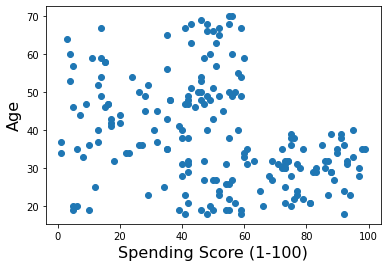

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    data.iloc[:, 0], 
    data.iloc[:, 1],
)

plt.xlabel(col1, fontsize=16)
plt.ylabel(col2, fontsize=16);

## Elbow Method

In [ ]:
# ???

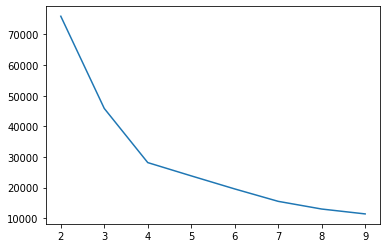

In [ ]:
from sklearn.cluster import KMeans

x = []
y = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    x.append(i)
    y.append(kmeans.inertia_)

plt.plot(x, y)

## Clustering

Mari lakukan clustering dengan *K-means*. Kita akan membuat model `KMeans()` dan menyerahkan jumlah cluster yang diinginkan sebagai argumen.

<font size=5><center>KMeans(n_clusters=<font color=darkgrey>jumlah kluster</font>)</center></font>

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)     # untuk membagi data menjadi 5 cluster/kelompok

Selanjutnya, kita memanggil fungsi `fit()` dan menyerahkan data yang ingin dibagi menjadi beberapa kluster.

<font size=5><center>fit(<font color=darkgrey>data</font>)</center></font>

In [ ]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Setelahnya, mari kita dapatkan daftar kelompok tiap data menurut klusternya. Kita memanggil fungsi `predict()` dan menyerahkan data sebagai argumen.

<font size=5><center>predict(<font color=darkgrey>data</font>)</center></font>

In [ ]:
group = kmeans.predict(data)

Berikut daftar kelompok data menurut klusternya masing-masing.

In [ ]:
group

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 0, 3, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

Sekarang, kita visualisasikan data dengan grafik lagi. Namun, kita tambahkan `group` (daftar kelompok data) sebagai argumen warna. Tujuannya supaya tiap warna titik merepresentasikan kelompoknya.

<font size=5><center>scatter(<font color=darkgrey>Series 1</font>, <font color=darkgrey>Series 2</font>, c=<font color=darkgrey>warna</font>)</center></font>

In [ ]:
kmeans.cluster_centers_

array([[82.35087719, 30.1754386 ],
       [49.14893617, 27.61702128],
       [15.02083333, 43.29166667],
       [48.22916667, 55.70833333]])

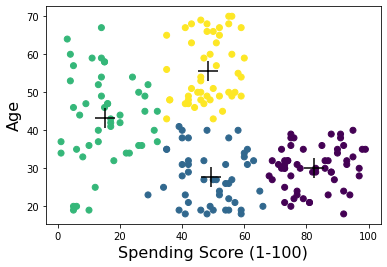

In [ ]:
plt.scatter( 
    data.iloc[:, 0],
    data.iloc[:, 1],
    c=group
)

plt.xlabel(col1, fontsize=16)
plt.ylabel(col2, fontsize=16);

centroid = kmeans.cluster_centers_
plt.scatter(centroid[:, 0], centroid[:, 1], marker='+', s=400, color='black')

In [ ]:
kmeans.inertia_

28165.58356662934

Kini tiap data pada grafik telah diwarnai sesuai dengan kelompokrnya. Kita berhasil membuat kluster untuk data `Spending Score` dan `Annual Income`.